#Import Libraries


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import datetime
from IPython.display import display, HTML
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from scipy.stats import pearsonr

#Reading CSV

In [8]:
# Read the CSV file located in the parent directory
df_2000 = pd.read_csv('2000.csv', encoding='ISO-8859-1', low_memory = False)
df_2001 = pd.read_csv('2001.csv', encoding='ISO-8859-1', low_memory = False)
df_plane = pd.read_csv('plane-data.csv', encoding='ISO-8859-1', low_memory=False)
df_airport = pd.read_csv('airports.csv', encoding='ISO-8859-1', low_memory=False)
df_carrier = pd.read_csv('carriers.csv', encoding='ISO-8859-1', low_memory=False)

#Concate the DataFrame


In [9]:
# Concatenate the DataFrame
df = pd.concat([df_2000, df_2001], ignore_index=True)

In [10]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11650827 entries, 0 to 11650826
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [11]:
#Checking All the available variables
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#Cleaning Data


In [12]:
# Drop rows with missing values in the 'DepTime', 'CRSDepTime', 'Year', 'Month', and 'DayofMonth' columns
df = df.dropna(subset=['DepTime', 'CRSDepTime', 'Year', 'Month', 'DayofMonth'])

#Filtering timestamp so that it follows 24 hours
df = df [df['DepTime'] <= 2359]
df = df [df['ArrTime'] <= 2359]
df = df [df['CRSDepTime'] <= 2359]
df = df [df['CRSArrTime'] <= 2359]
df.shape

(11199246, 29)

In [13]:
#Overview of data
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,1.119925e+07,...,1.119925e+07,1.119925e+07,11199246.0,0.0,11199246.0,0.0,0.0,0.0,0.0,0.0
mean,2.000511e+03,6.411387e+00,1.572671e+01,3.955493e+00,1.351894e+03,1.343295e+03,1.488566e+03,1.498562e+03,1.228973e+03,1.269270e+02,...,6.334235e+00,1.579145e+01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
std,4.998826e-01,3.408433e+00,8.816041e+00,1.996000e+00,4.871157e+02,4.766727e+02,5.184188e+02,4.994913e+02,1.016752e+03,7.107465e+01,...,4.633745e+00,1.068322e+01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,2.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-7.190000e+02,...,1.000000e+00,1.000000e+00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25%,2.000000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.109000e+03,1.115000e+03,4.690000e+02,7.400000e+01,...,4.000000e+00,1.000000e+01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,2.001000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.335000e+03,1.330000e+03,1.522000e+03,1.525000e+03,1.032000e+03,1.080000e+02,...,5.000000e+00,1.300000e+01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,2.001000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.745000e+03,1.735000e+03,1.924000e+03,1.922000e+03,1.746000e+03,1.600000e+02,...,7.000000e+00,1.900000e+01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
max,2.001000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.359000e+03,2.359000e+03,2.359000e+03,6.879000e+03,8.500000e+02,...,3.290000e+02,5.020000e+02,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
#Checking number of duplicate rows
print('Number of duplicate values: ', len(df[df.duplicated() == True]))

Number of duplicate values:  0


In [15]:
#Dropping variables unrelated to the question
df = df.drop(['TaxiIn', 'TaxiOut', 'Diverted'], axis = 1)

In [16]:
#Check shape after dropping unrelated columns
print('Shape after dropping columns with all NA: ', df.shape) #There are no missing values

Shape after dropping columns with all NA:  (11199246, 26)


In [17]:
#Checking number of cancelled flights
len(df[df['Cancelled'] == 1])

0

In [18]:
# Get the unique values in the Month column
months = df['Month'].unique()

# Print the unique values
print(months)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


# Question 1
When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [19]:
#Introducing new variable delay
df['delay'] = df['ArrDelay'] + df['DepDelay']

#Filter & Sort values of delay => 0
df = df[df['delay'] >= 0 ].sort_values(by = ('delay')) 

### *Question 1.1*
Best Time of day

In [20]:
#Q1.1
#Average delay based on time of departure
#time = df.groupby(df['CRSDepTime']).mean().reset_index()
time = df.groupby(df['CRSDepTime']).mean(numeric_only=True).reset_index()
#time.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek'], axis = 1)
time[['CRSDepTime', 'delay']].sort_values('delay').head(10)

,CRSDepTime,delay
106,519,6.000000
102,508,7.200000
119,538,7.555556
121,542,9.000000
126,547,9.181818
10,16,11.000000
83,147,12.500000
109,523,12.945946
94,225,14.350000
108,522,15.114286


Text(0.5, 1.0, 'Average Delay by Scheduled Departure Time')

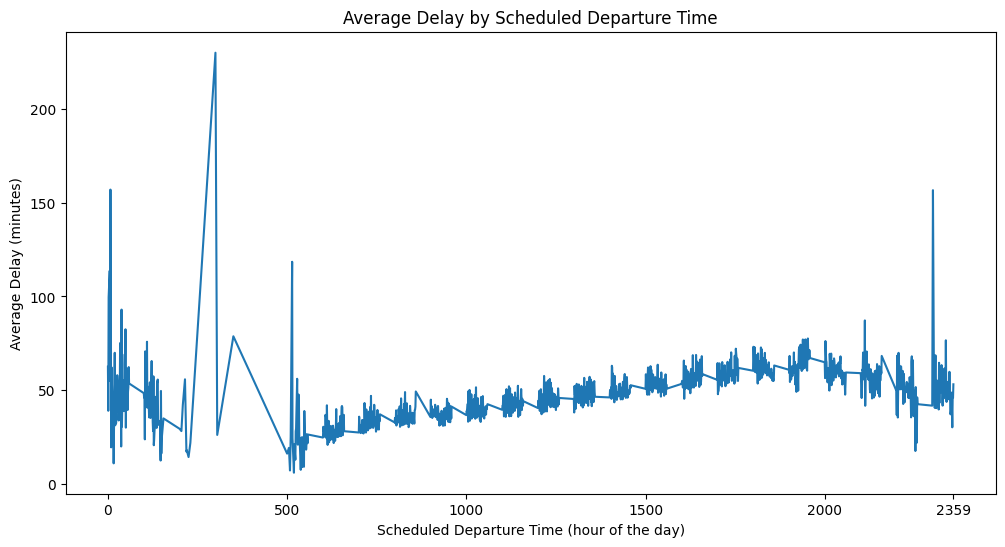

In [21]:
# Plot the data on a line chart
plt.figure(figsize=(12,6)) # set the figure size to make the chart wider
plt.plot(time['CRSDepTime'], time['delay'])
plt.xticks([0, 500, 1000, 1500, 2000, 2359])
plt.xlabel('Scheduled Departure Time (hour of the day)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Scheduled Departure Time')

In [22]:
# Find the time with the smallest average delay
best_time = time.loc[time['delay'].idxmin(), 'CRSDepTime']

# Convert the best time to a string and pad with leading zeros if necessary
best_time_str = str(int(best_time)).zfill(4)

# Convert the best time string to a time object
best_time_obj = datetime.datetime.strptime(best_time_str, '%H%M').time()

# Create a dummy date object
dummy_date = datetime.date(2000, 1, 1)

# Combine the dummy date and the best time to create a datetime object
best_datetime_obj = datetime.datetime.combine(dummy_date, best_time_obj)

# Format the datetime object as a string in the 24-hour clock format
best_time_str = best_datetime_obj.strftime('%H:%M')

# Print the best time
print("The best time of day to fly to minimise delays is:", best_time_str)

The best time of day to fly to minimise delays is: 05:19


Hence, the best time of day to fly is **05:19** for the least delay.


### **Question 1.2**
Best Day of the week to fly

In [23]:
#Q1.2
# Group the records by the day of the week and calculate the average delay for each day
day = df.groupby(df['DayOfWeek']).mean(numeric_only=True).reset_index()
day[['DayOfWeek', 'delay']].sort_values('delay').head()

,DayOfWeek,delay
1,2,40.645168
2,3,43.065462
0,1,43.379523
5,6,43.937650
3,4,48.047819


In [24]:
# Create a list of weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the DayOfWeek column to integers
day['DayOfWeek'] = day['DayOfWeek'].astype(int)

# Map the day of the week to the corresponding index in the weekdays list
day['DayOfWeek'] = day['DayOfWeek'].map(lambda x: weekdays[x-1])

# Sort the day DataFrame by the DayOfWeek column using the weekdays list as the key
day = day.sort_values('DayOfWeek', key=lambda x: x.map(weekdays.index))

# Map the day of the week to the corresponding index in the weekdays list
day[['DayOfWeek', 'delay']].sort_values('delay').head()

,DayOfWeek,delay
1,Tuesday,40.645168
2,Wednesday,43.065462
0,Monday,43.379523
5,Saturday,43.937650
3,Thursday,48.047819


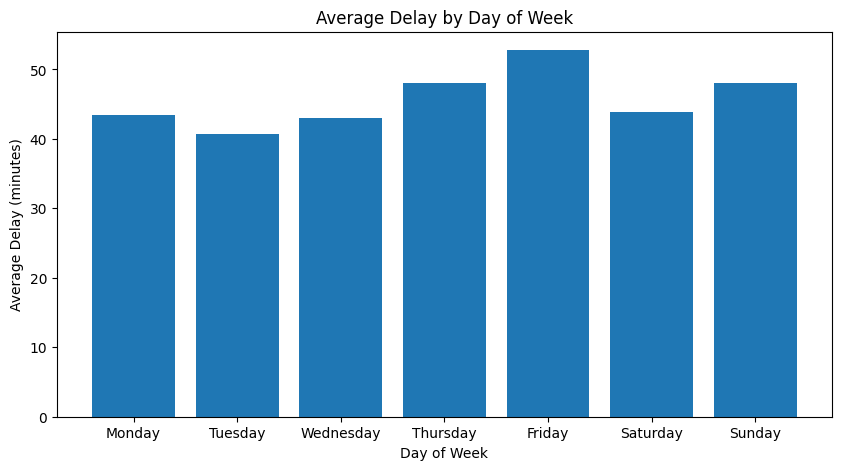

In [25]:
# Plot the data on a bar chart
plt.figure(figsize=(10, 5))  # Make the figure wider
plt.bar(day['DayOfWeek'], day['delay'])
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Day of Week')
plt.show()

In [26]:
# Find the day of the week with the smallest average delay
best_day = day.loc[day['delay'].idxmin(), 'DayOfWeek']

# Print the best day of the week
print("The best day of the week to fly to minimize delays is:", best_day)

The best day of the week to fly to minimize delays is: Tuesday


Hence, the best day of the week to fly is: **Tuesday**

### **Question 1.3**
Best month of the year to fly

In [27]:
#Q1.3
month = df.groupby('Month')['delay'].mean().reset_index()
#month[['Month', 'delay']].sort_values('delay').head()
month.head(12)

,Month,delay
0,1,42.648033
1,2,46.219930
2,3,43.780346
3,4,43.849416
4,5,44.950319
5,6,54.653975
6,7,50.135735
7,8,50.612963
8,9,43.762262
9,10,39.342429


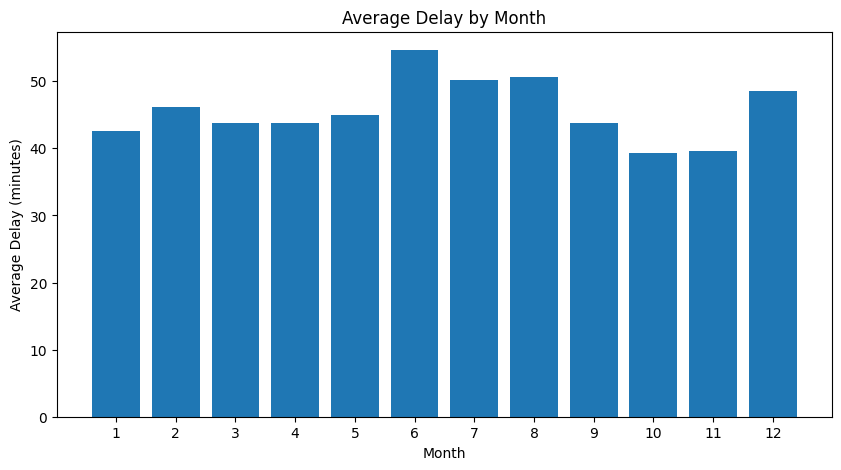

In [28]:
# Plot the data on a bar chart
plt.figure(figsize=(10, 5))  # Make the figure wider
plt.bar(month['Month'], month['delay'])
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month')
plt.show()

In [29]:
# Sort the month DataFrame by average delay in ascending order
month_sorted = month.sort_values('delay')

# Print the row with the smallest average delay
best_month = month_sorted.iloc[0]

month_sorted.head()

,Month,delay
9,10,39.342429
10,11,39.606083
0,1,42.648033
8,9,43.762262
2,3,43.780346


In [30]:
# Print the result
print("The best month of the year to fly to minimize delays is:", best_month['Month'])

The best month of the year to fly to minimize delays is: 10.0


Hence the bes month of the year to fly is **October**.


# Question 2
Do older planes suffer more delays?

In [31]:
#Count number of flights by year
num_flights = df.merge(df_plane.rename(columns={'tailnum': 'TailNum'}),
                   how='left',
                   on='TailNum', 
                   copy=False).groupby(['year', 'TailNum']).mean(numeric_only=True).reset_index().sort_values('year')

# Filter out any rows where year is '0000' or 'None'
num_flights = num_flights[(num_flights['year'] != '0000') & (num_flights['year'] != 'None')]

# top 5 years with the lowest average delay
num_flights[['year', 'delay']].sort_values('delay').head(5)

# Print the top 10 years with the highest number of flights
num_flights.groupby(['year'])['year'].count().reset_index(name = 'Count').sort_values('Count', ascending = False).head(10)

,year,Count
37,1999,157
36,1998,154
38,2000,146
29,1991,133
30,1992,130
28,1990,129
26,1988,124
25,1987,117
27,1989,101
35,1997,72


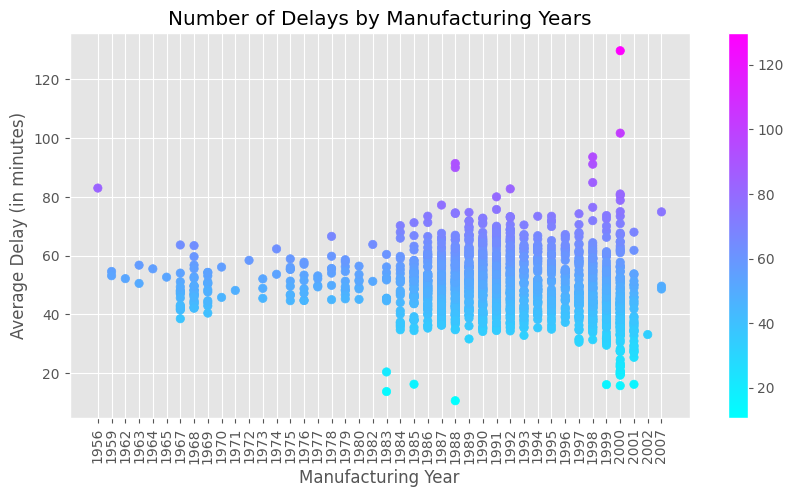

In [32]:
# Set the style of the plot
plt.style.use('ggplot')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Create the scatter plot
scatter = ax.scatter(num_flights['year'], num_flights['delay'], c=num_flights['delay'], cmap='cool')
plt.xticks(rotation=90)

# Add a color bar to the plot
cbar = fig.colorbar(scatter)

# Set the axis labels and title
ax.set_xlabel('Manufacturing Year')
ax.set_ylabel('Average Delay (in minutes)')
ax.set_title('Number of Delays by Manufacturing Years')

# Add a grid to the plot
ax.grid(True)

# Show the plot
plt.show()


# Question 3
How does the number of people flying between different locations change over time?

In [33]:
#Number of flights by month in 2000
flight_counts = df.groupby(['Year','Month'])['Month'].count().reset_index(name = 'Flights')
flight_counts.head().sort_values('Flights')

,Year,Month,Flights
1,2000,2,222802
0,2000,1,228441
3,2000,4,238048
4,2000,5,240982
2,2000,3,242981


In [34]:
#Number of flights over the years
flightsummary = df.groupby(['Year'])['Year'].count().reset_index(name = 'Flights')
flightsummary

,Year,Flights
0,2000,2996611
1,2001,2683090


In [35]:
# Convert the flight data to a pivot table
flights_pivot = flight_counts.reset_index().pivot(index='Year', columns='Month', values='Flights')
flights_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2000,228441,222802,242981,238048,240982,277700,270550,276729,217397,244095,254693,282193
2001,251968,238731,261635,231273,222269,253790,251532,259545,146381,181036,177225,207705


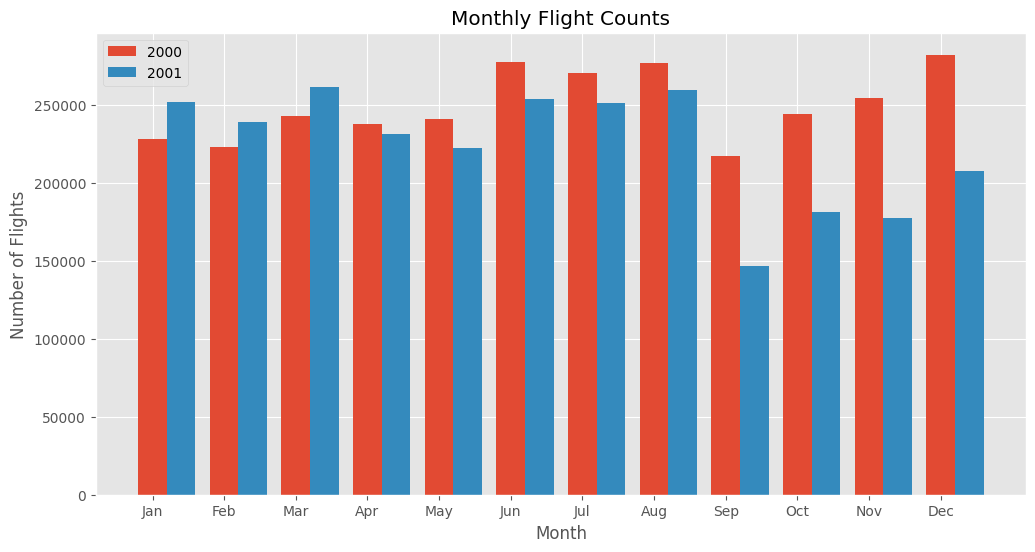

In [36]:
# Set the plot style
plt.style.use('ggplot')

# Define the data
x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = flights_pivot.index
n_years = len(years)
n_months = len(x_labels)
bar_width = 0.8 / n_years

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through the years and plot the monthly flight counts side-by-side
for i, year in enumerate(years):
    x_positions = np.arange(n_months) + i * bar_width
    ax.bar(x_positions, flights_pivot.loc[year], width=bar_width, label=year)

# Set the plot title and axis labels
ax.set_title('Monthly Flight Counts')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(n_months))
ax.set_xticklabels(x_labels)

# Add the legend
ax.legend()

# Show the plot
plt.show()

# Question 4
Can you detect cascading failures as delays in one airport create delays in others?

In [37]:
#Finding correlation coefficient and p-value
print(pearsonr(df['DepDelay'], df['ArrDelay']))

PearsonRResult(statistic=0.9068451943617628, pvalue=0.0)


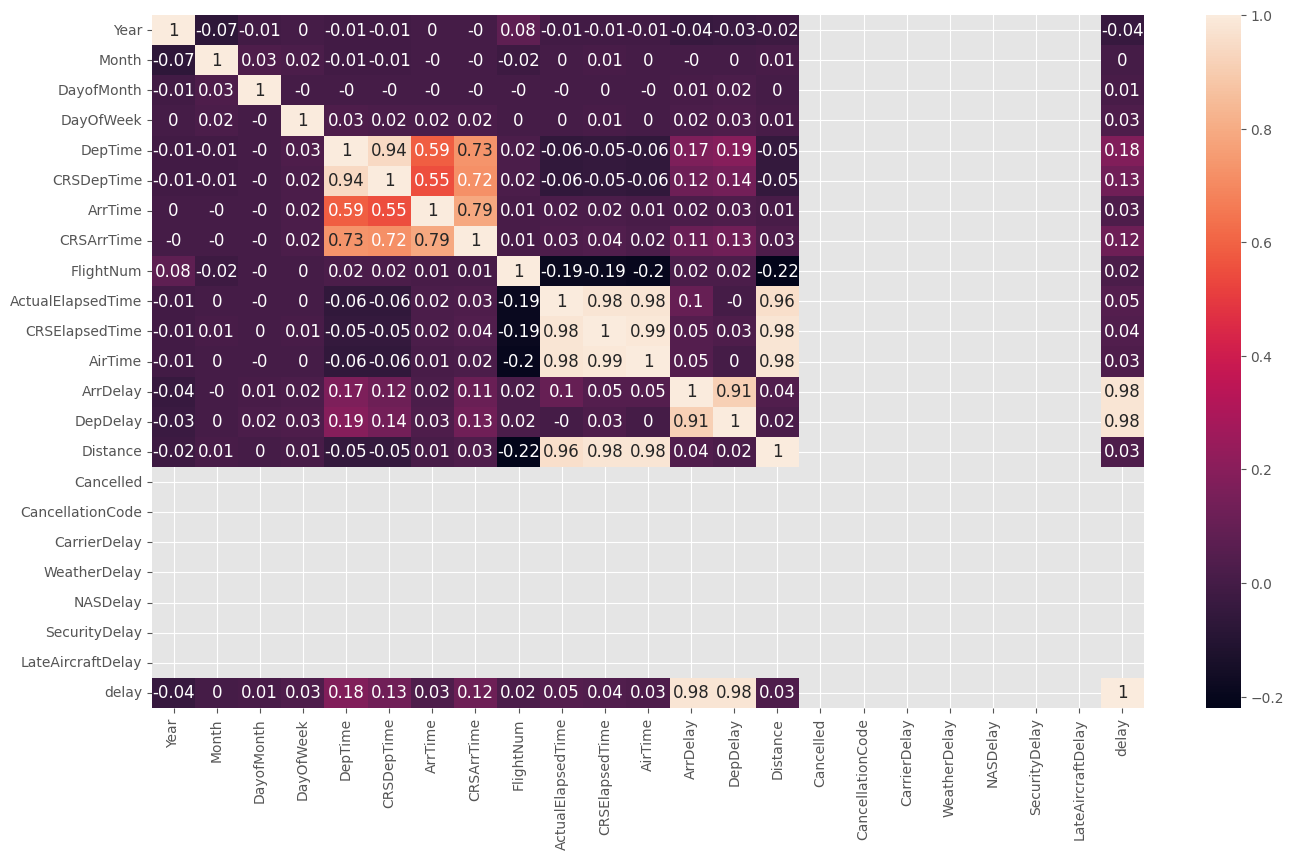

In [38]:
#Corr Matrix 
fig, ax = plt.subplots(figsize=(16, 9))
corrMatrix = df.corr(numeric_only=True).round(2)
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 12})
plt.show()

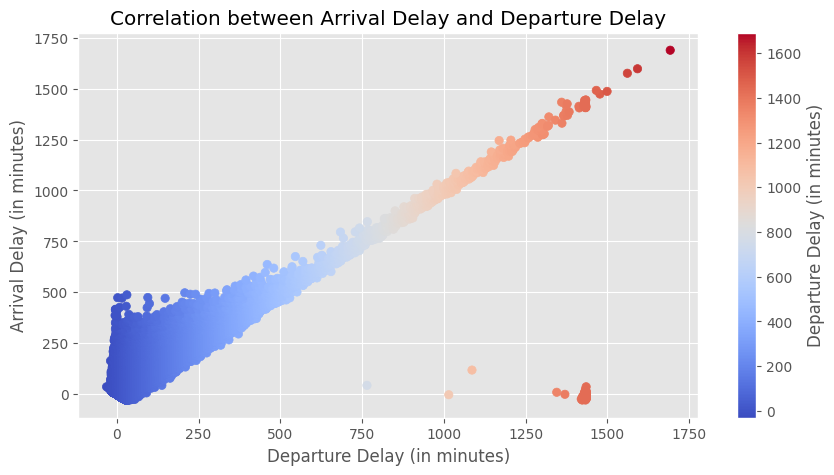

In [39]:
# Create some data
x = df['DepDelay']
y = df['ArrDelay']

# Define the colormap
cmap = plt.get_cmap('coolwarm')

# Create the scatter plot
plt.subplots(figsize = (10, 5))
plt.scatter(x, y, c=x, cmap=cmap)
plt.title('Correlation between Arrival Delay and Departure Delay')
plt.xlabel('Departure Delay (in minutes)')
plt.ylabel('Arrival Delay (in minutes)')

# Add a colorbar
cb = plt.colorbar()
cb.set_label('Departure Delay (in minutes)')

# Question 5
Use the available variables to construct a model that predicts delays.

In [40]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [41]:
# Define the independent variables
X = df[['Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'ActualElapsedTime', 'DepDelay', 'Distance']]
y = df['ArrDelay']

#Create empty list as placeholder
MSE = []
Rsquared = []

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

# Train a linear regression model
model = LinearRegression()
reg = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LRMSE = mean_squared_error(y_test,y_pred)
MSE.append(LRMSE)

LiregRsq = r2_score(y_test, y_pred)
Rsquared.append(LiregRsq)

In [43]:
print('Linear Regression')
print('-----------------')
print('R^2: ', LiregRsq)
print('MSE: ', LRMSE)

Linear Regression
-----------------
R^2:  0.9177205700596189
MSE:  131.55161945305036


In [44]:
# Train a lasso regression model
lasso_reg = Lasso(alpha=0.1, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

lasso_reg.score(X_test, y_test)

lasso_pred = lasso_reg.predict(X_test)

lassoMSE = mean_squared_error(y_test, lasso_pred)

MSE.append(lassoMSE)
Rsquared.append(lasso_reg.score(X_test, y_test))

print('Lasso Regression')
print('-----------------')
print('R^2 test : ', lasso_reg.score(X_test, y_test))
print('R^2 train: ', lasso_reg.score(X_train, y_train))
print('MSE : ', lassoMSE)

Lasso Regression
-----------------
R^2 test :  0.8613495718156012
R^2 train:  0.8571626108014271
MSE :  221.67980962839488


In [45]:
# Train a ridge regression model
ridge_reg = Ridge(alpha=0.1, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)

ridgeMSE = mean_squared_error(y_test, ridge_pred)

MSE.append(ridgeMSE)
Rsquared.append(ridge_reg.score(X_test, y_test))

print('Ridge Regression')
print('-----------------')
print('R^2 test: ', ridge_reg.score(X_test, y_test))
print('R^2 train: ', ridge_reg.score(X_train, y_train))
print('MSE : ', ridgeMSE)

Ridge Regression
-----------------
R^2 test:  0.9177205700593659
R^2 train:  0.9118322185760108
MSE :  131.551619453455


In [46]:
# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=4, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)

RFMSE = mean_squared_error(y_test, y_hat)

print('\nRandom Forest')
print('--------------')
print('MSE RF: ', RFMSE)
print('R^2: ', r2_score(y_test, y_hat))
print('R^2 test: ', rf_model.score(X_test, y_test))
print('R^2 train: ', rf_model.score(X_train, y_train))


Random Forest
--------------
MSE RF:  42.04254004871406
R^2:  0.9737043432620881
R^2 test:  0.9737043432620881
R^2 train:  0.9950224497595879


In [47]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=4)
xgb_model.fit(X_train, y_train)
y_hat = xgb_model.predict(X_test)

XGBMSE = mean_squared_error(y_test, y_hat)

print('MSE XGB: ', mean_squared_error(y_test, y_hat))
print('R^2: ', r2_score(y_test, y_hat))
print('R^2 test: ', xgb_model.score(X_test, y_test))
print('R^2 train: ', xgb_model.score(X_train, y_train))

MSE XGB:  47.842327463965425
R^2:  0.9700768455217612
R^2 test:  0.9700768455217612
R^2 train:  0.9710376208362382


In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test = imputer.fit_transform(X_test)

#Append to list
MSE.append(XGBMSE)
Rsquared.append(xgb_model.score(X_test, y_test))

In [49]:
#Creating new dataframe for performance
names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest']

df = pd.DataFrame()
df['Model'] = names
df['MSE'] = MSE
df.head().sort_values('MSE', ascending = True)

,Model,MSE
3,Random Forest,47.842327
0,Linear Regression,131.551619
2,Ridge Regression,131.551619
1,Lasso Regression,221.679810


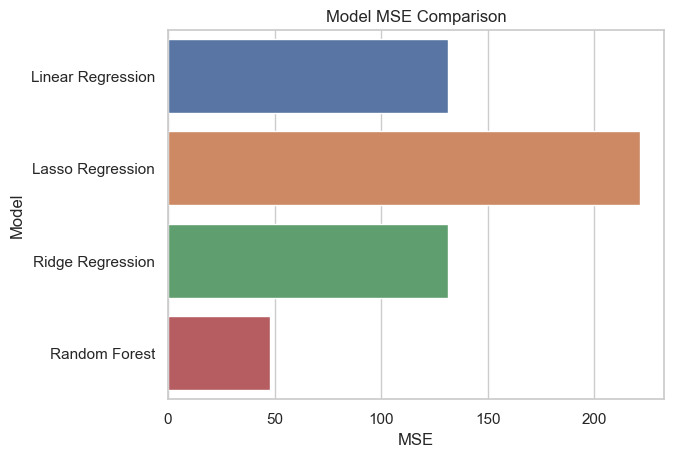

In [50]:
#Visualizaiton for MSE
sns.set(style="whitegrid")
ax = sns.barplot(y='Model', x='MSE', data=df)
ax.set_title('Model MSE Comparison')
ax.set_xlabel('MSE')
ax.set_ylabel('Model')
plt.show()

In [51]:
#R Square Dataframe
df1 = pd.DataFrame()
df1['Model'] = names
df1['Rsquared'] = Rsquared
df1.head().sort_values('Rsquared', ascending = False)

,Model,Rsquared
3,Random Forest,0.970077
0,Linear Regression,0.917721
2,Ridge Regression,0.917721
1,Lasso Regression,0.861350


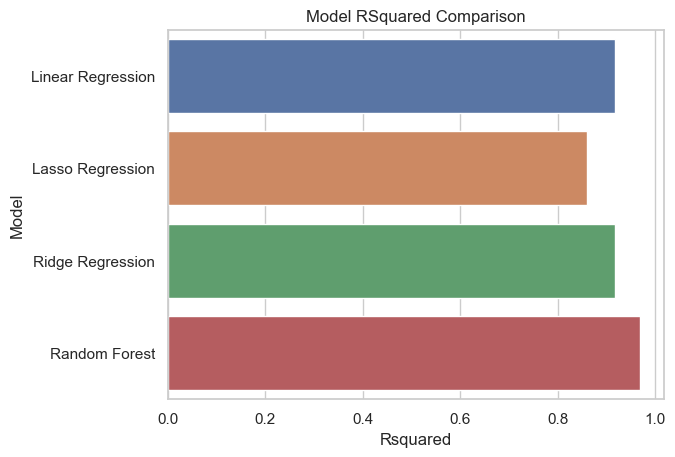

In [52]:
#Visualization for RSquared
sns.set(style="whitegrid")
ax = sns.barplot(y='Model', x='Rsquared', data=df1)
ax.set_title('Model RSquared Comparison')
ax.set_xlabel('Rsquared')
ax.set_ylabel('Model')
plt.show()